### 파이썬 머신러닝
## 텍스트 데이터 다루기
---
## KoNLPY 를 이용한 네이버 영화 리뷰 다루기

### 영화 리뷰 다운로드
- https://github.com/e9t/nsmc
- ratings_train.txt 와 ratings_test.txt 다운로드

### 데이터 읽어오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('ratings_train.txt', delimiter='\t', 
                       keep_default_na=False)

In [3]:
df_train.shape

(150000, 3)

In [4]:
df_train.tail(5) # label 0: 부정, label 1: 긍정

,id,document,label
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
149999,9619869,한국 영화 최초로 수간하는 내용이 담긴 영화,0


In [5]:
df_test = pd.read_csv('ratings_test.txt', delimiter='\t', keep_default_na=False)

In [6]:
df_test.shape

(50000, 3)

In [7]:
df_test.head(5)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


### Numpy 어레이로 변환

In [8]:
text_train = df_train.document.values
y_train = df_train.label.values

text_test = df_test.document.values
y_test = df_test.label.values

In [9]:
display(text_train.shape, y_train.shape)
display(text_test.shape, y_test.shape)

(150000,)

(150000,)

(50000,)

(50000,)

In [10]:
np.bincount(y_train)

array([75173, 74827], dtype=int64)

In [11]:
np.bincount(y_test)

array([24827, 25173], dtype=int64)

### konlpy 설치

- http://konlpy.org/ko/latest/install/ 도움말 참조하여 설치 진행
> 32비트와 64비트에 맞게 설치 진행 (아래는 64비트 기준임)

- 자바 jdk 설치
> 환경변수 PATH 에 C:\Program Files\Java\jdk1.8.0_251\bin 와 같이 추가

- JAVA_HOME 설정
> C:\Program Files\Java\jdk1.8.0_251

- pip 업그레이드
> 아나콘다 프롬프트를 관리자 권한으로 실행<br>
> (base) >pip install --upgrade pip

- JPype1 설치
>- https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 에서<br>
> JPype1-0.7.3-cp36-cp36m-win_amd64.whl 다운로드<br>
>- (base) >pip install JPype1-0.7.3-cp36-cp36m-win_amd64.whl

- konlpy 설치
> (base) >pip install konlpy

- 아나콘다 프롬프트와 jupyter notebook 재실행

### konlpy 테스트

In [12]:
from konlpy.tag import Twitter, Okt

In [13]:
twitter_tag = Okt() # 기존 Twitter 에서 Okt 로 변경됨

In [23]:
twitter_tag.morphs('도널드 트럼프 미국 대통령은 28일(현지시간) 김정은 북한 국무위원장이 살아있느냐는 질문에 침묵으로 답변을 대신했다. 전날 김 위원장의 건강상태에 대해 잘 알고 있다고 언급한 것과 사뭇 결이 달라진 것이다.')

['도널드',
 '트럼프',
 '미국',
 '대통령',
 '은',
 '28일',
 '(',
 '현지',
 '시간',
 ')',
 '김정은',
 '북한',
 '국무위원',
 '장이',
 '살아있느냐는',
 '질문',
 '에',
 '침묵',
 '으로',
 '답변',
 '을',
 '대신',
 '했다',
 '.',
 '전날',
 '김',
 '위원장',
 '의',
 '건강',
 '상태',
 '에',
 '대해',
 '잘',
 '알',
 '고',
 '있다고',
 '언급',
 '한',
 '것',
 '과',
 '사뭇',
 '결',
 '이',
 '달라진',
 '것',
 '이다',
 '.']

In [17]:
twitter_tag.nouns('겨울이 가고 어느덧 봄이 오는지 어제는 봄비가 많이 내렸습니다')

['겨울', '봄', '어제', '봄비']

In [19]:
twitter_tag.phrases('겨울이 가고 어느덧 봄이 오는지 어제는 봄비가 많이 내렸습니다')

['겨울', '어제', '봄비']

In [20]:
twitter_tag.morphs('홍길동은 조선시대 사람이죠?')

['홍길동', '은', '조선시대', '사람', '이', '죠', '?']

In [22]:
twitter_tag.pos('홍길동은 조선시대 사람이죠?')

[('홍길동', 'Noun'),
 ('은', 'Josa'),
 ('조선시대', 'Noun'),
 ('사람', 'Noun'),
 ('이', 'Suffix'),
 ('죠', 'Josa'),
 ('?', 'Punctuation')]

### 머신러닝 적용

- CountVectorizer 적용 (1000개 샘플씩 적용)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vect = CountVectorizer(tokenizer=twitter_tag.morphs, min_df=3)
X_train = vect.fit_transform(text_train[:1000])
X_test = vect.transform(text_test[:1000])

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1)
model.fit(X_train, y_train[:1000])
score = model.score(X_test, y_test[:1000])
score

0.713

- TfidfVectorizer 적용 (1000개 샘플씩 적용)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# help(TfidfVectorizer)

In [29]:
tfidf = TfidfVectorizer(tokenizer=twitter_tag.morphs, min_df=3)
X_train = tfidf.fit_transform(text_train[:1000])
X_test = tfidf.transform(text_test[:1000])

In [30]:
X_train.shape, X_test.shape

((1000, 789), (1000, 789))

In [32]:
display(len(tfidf.get_feature_names()), tfidf.get_feature_names()[::50])

789

['!',
 'ㅜㅜ',
 '구성',
 '남자',
 '도대체',
 '만',
 '발',
 '빨리',
 '시절',
 '알았음',
 '연예계',
 '이기',
 '자극',
 '조폭',
 '참고',
 '하는데']

- X_train 에 대해 교차 검증

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(C=1)
scores = cross_val_score(model, X_train, y_train[:1000], cv=5)
scores

array([0.74626866, 0.74626866, 0.77      , 0.69849246, 0.68844221])

- X_test 예측 점수

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1)
model.fit(X_train, y_train[:1000])
score = model.score(X_test, y_test[:1000])
score

0.711

- CountVectorizer (모든 데이터 사용)

In [ ]:
vect = CountVectorizer(tokenizer=twitter_tag.morphs, min_df=3)
X_train = vect.fit_transform(text_train)
X_test = vect.transform(text_test)

In [37]:
fn = vect.get_feature_names()
len(fn)

33208

In [39]:
model = LogisticRegression(C=1)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.85004

In [41]:
ws = model.coef_[0]
ws

array([0.49633262, 0.62735368, 0.37956764, ..., 0.14260661, 0.48247122,
       0.1072011 ])

In [45]:
idx = np.argsort(ws)
idx

array([28882, 25134, 25174, ..., 28851, 25239,  6012], dtype=int64)

In [51]:
fn = np.array(fn)

In [53]:
fn[idx[-10:]]

array(['재밌네', '굿굿', '재밌었다', '훌륭하다', '좋았어요', '재밌는데', '재미있어요', '최고다',
       '재미있었어요', '낮네'], dtype='<U54')

In [57]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NGULIM.TTF").get_name()
# h2gprm.ttf, uni_hsr.ttf, hynaml.ttf, nanumgothic.ttf, ng.ttf(나눔고딕)
rc('font', family=font_name)

array(['최악', '재미없다', '재미없음', '지루하다', '재미없었다', '재미없는', '과대', '재미없어요',
       '재미없어', '재미없네', '잤다', '노잼', '지루했다', '별루', '..,,', '졸작', '흑역사',
       '재미없네요', '실망', '빵점', '높아서', '재미없', '아까', '재미없게', '유치하다', '하품',
       '아깝다', '지루했어요', '짝퉁', '모욕', '닿지', '쓰레기', '2.22', '재미없었던', '높다',
       '짜증', '불면증', '오유', '꽝', '망작'], dtype='<U54')

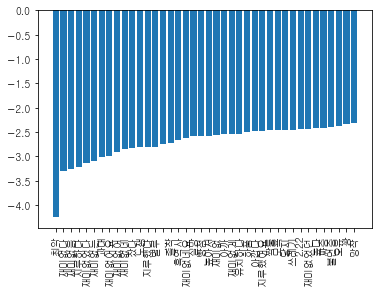

In [77]:
plt.bar(range(40), ws[idx[:40]])
plt.xticks(range(40), fn[idx[:40]], rotation=90)
display(fn[idx[:40]])
pass

array(['재밌다', '재밋어', '재밌어요', '꿀잼', '재밌었음', '재밌었어요', '재밌던데', '재밌네요', '재밌음',
       '좋았습니다', '재밌네', '굿굿', '재밌었다', '훌륭하다', '좋았어요', '재밌는데', '재미있어요',
       '최고다', '재미있었어요', '낮네'], dtype='<U54')

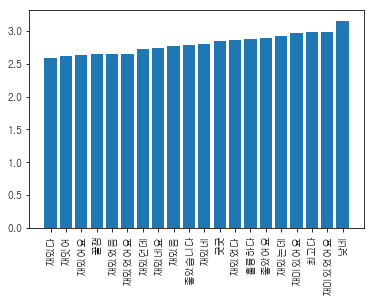

In [60]:
plt.bar(range(20), ws[idx[-20:]])
plt.xticks(range(20), fn[idx[-20:]], rotation=90)
display(fn[idx[-20:]])
pass

In [61]:
vect.vocabulary_['낮네']

6012

In [69]:
X_train.shape, type(X_train)

((150000, 33208), scipy.sparse.csr.csr_matrix)

In [64]:
X_train[:,6012].shape

(150000, 1)

In [71]:
l = []
for i in range(150000):
    if X_train[i,6012]>0: l.append(i) # 6012: '낮네'
        
l

[2760,
 3790,
 4643,
 10243,
 13064,
 15094,
 16145,
 20986,
 21018,
 22188,
 23306,
 24571,
 25842,
 27494,
 29181,
 29607,
 30175,
 30955,
 33096,
 33110,
 33629,
 34018,
 34546,
 34753,
 35618,
 35769,
 35865,
 36139,
 37112,
 39454,
 40063,
 41004,
 42344,
 44770,
 45081,
 46390,
 47288,
 47518,
 49686,
 51145,
 51285,
 51888,
 52693,
 53094,
 53562,
 53698,
 53844,
 56914,
 57311,
 57482,
 58242,
 59826,
 60084,
 60680,
 61148,
 62852,
 65586,
 67296,
 68329,
 70377,
 70397,
 75466,
 75800,
 80695,
 84947,
 85852,
 87239,
 87404,
 87979,
 88340,
 90658,
 92047,
 92686,
 92946,
 93709,
 94192,
 94834,
 94938,
 95605,
 99441,
 102577,
 105738,
 105815,
 105834,
 108160,
 109926,
 110398,
 111136,
 111363,
 113888,
 115005,
 117398,
 124641,
 129490,
 132812,
 133602,
 135032,
 136032,
 136046,
 136202,
 139607,
 143315,
 144627,
 147639,
 148354,
 148948,
 149239]

In [72]:
text_train[l]

array(['정말 역사에 남을 만한 소름끼치는 작품인데 평점은 양아치 조폭 형사 살인범 쳐나오는 몇몇 한국영화 따위 보다도 낮네? 안타깝다 안타까워!!',
       '괜찮은 영화. 평점이 너무 낮네 ㅡㅡ;', '이거 평점이 너무 낮네;;난 감동깊게 봤는데..재미도 있었고..',
       '평점이 너무 낮네.. 이 정도면 오락영화로서 손색이 없다..', '평점이 너무 낮네...',
       '웬만한 한국영화보다 낮네 ㅋㅋㅋ', '괜찮던데...평점이 너무 낮네',
       '브리짓존스의 일기...유명함에 비해 너무 순위가 낮네. 개성있는 캐릭터가 만드는 정말 재미있는 영화이다',
       '평점이 낮네.. 시리즈가 다 잼있다.', '재미있었는데 평점이 낮네',
       '참신 했던 영화였는데 평점이 너무 낮네 8점대는 나와도 될듯한데',
       '니콜성님 젊었을때 찍은 영화! 나름 볼만한 영화인데 평점이 낮네?',
       '이거 꽤나 잘만든 영화같은데 평점이 낮네...주인공이 거지같은건 영화스토리상 의도된 부분이고, 자체의 개연성이나 사회비판적인 부분과 연출같은건 나쁘지 않았다고 생각함. 개인적으로는 8점.',
       '평점이 너무낮네 ㅣ재밋는데', '평점이 7점대라니?? 조폭 형사 살인범들 쳐나오는 한국영화따위 보다도 낮네',
       '재밌게 봤는데 예상외로 평점이 낮네', '진짜웃기고재밍는데..평점이쫌낮네?!/급마무리가살.짝.아쉽지만!',
       '평이너무 낮네....기대하지 않게 정말 재미있었다.....인생은 열어봐야 알수 있다...',
       '재미나게 봤는데 평점이 낮네..', '각색이 새로웠다 재미 있음 난 볼만한데 평점이 낮네? ㅋ',
       '재밌게 봤는데 평점이 낮네', '이게 왜 평점이 낮지? 작화도 스토리도 탄탄하지 않냐 수준들이 낮네',
       '괜찮은 영화인데 평점이 너무 낮네 평점올리기 10점주고감 스릴러로선 나무랄데 없었던 영화',
       '평점이 생각보다 낮네 옛날

In [81]:
vect.vocabulary_['오유']

21644

In [82]:
l = []
for i in range(150000):
    if X_train[i,21644]>0: l.append(i)
        
l

[2839,
 3636,
 6347,
 18279,
 28537,
 32367,
 33340,
 34877,
 42058,
 42653,
 43950,
 47794,
 48044,
 53190,
 53373,
 56054,
 59663,
 64261,
 65599,
 66140,
 71693,
 81008,
 81168,
 91199,
 96530,
 99052,
 101430,
 102815,
 111102,
 116955,
 117561,
 127190,
 127694,
 136909,
 138355,
 139021,
 140468,
 144667,
 146299]

In [83]:
text_train[l]

array(['오유에서 왔당께~이딴걸 왜 돈주고 볼까?', '일베에서 왔는데 오유님들 너무하시네요',
       '오유에서 왔습니다. 슈퍼즈니어OOO!에험', '오유에서 왔습니다 엣헴 엣헴',
       '오유에서 왔습니다. G-DRUG, 데쓰엉, 섹리 화이팅!', '오유에서 왓수다', '오유에서 왓삼',
       '으리!!!!! 오유 화이팅!!', '오유보다는 재밌네요', '오유에서 왔어요~ ^^♡',
       '걍 볼만해요 솔까 오유에 꽤 못미쳐요 ㅋㅋ..ㅋ..ㅋ..', '오유에서 왔습니다',
       '오유짱 오늘의유머가 짱 짱짱 1점땅크 나가신다 부릉부릉 헤헤 부대열중쉬어',
       '일베 오유 OO들땜에깍는다 김보성나온영화는', '오유가 갑이제~', '오유 굳ㅋ',
       '오유에서 왔습니다. 꼭 보고싶어요', '오유에서 왔어요', '오유 회식남 흥해라!!!',
       '오유에서 왔음. 어험...', '오유에서왓쪄용', '오유에서 왔어요~^^', '오유쵝오', '오유 화이팅~',
       '일베충들 오유사칭하면서 별점 깎아내리는 클라스', '한번 보면 빠져나올 수 없는 뮤지컬.. 오유 사랑합니다!!',
       '일베 오유 OOO들 10주면 너희는 인간을 포기했다 ㅄ색히들', '진짜 오유분들..ㅠㅠ 자제좀 해주세요....',
       '오유에서 왔습니다. 에헴에헴',
       '내가 뮤지컬이란 분야에 애정과 관심을 갖게 해준 공연.라민시에라하들리 앤드류님 다 스릉합니다ㅜㅜ 오유 흥해라!',
       '오유에서 성지순례왔슴돠^^', '오유에서왔는데 진짜답없음;', '오유에서 왔써예',
       '오유에서 왔는데 괜찮게 봤습니다 고로', '오유에서왔습니다', '오유에서 왔습니다 엣헴 저런 선동영화는 OUT',
       '오유분들 이 불건전한 영화의 평점을 내립시다!!', '오유에서 왔습니다! 오유 화이팅!', '오유에서옴 에헴에헴'],
      dtype=object)

- TfidfVectorizer (모든 데이터 사용)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

tfidf = TfidfVectorizer(tokenizer=twitter_tag.morphs, min_df=3)
X_train = tfidf.fit_transform(text_train)
X_test = tfidf.transform(text_test)
fn = tfidf.get_feature_names()
np.save('naver_movie.npy', [X_train, X_test])
np.save('naver_movie_fn.npy', fn)

#X_train, X_test = np.load('naver_movie.npy')
#fn = np.load('naver_movie_fn.npy')

In [30]:
model = LogisticRegression(C=1)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.85182

In [31]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)
score = nb.score(X_test, y_test)
score

0.84672